# Basic Test

In [1]:

from imports import *
from agents import *
from environment import *
from simulations import *
from utils import *
from stationarity_analysis import *

# Environment Testing

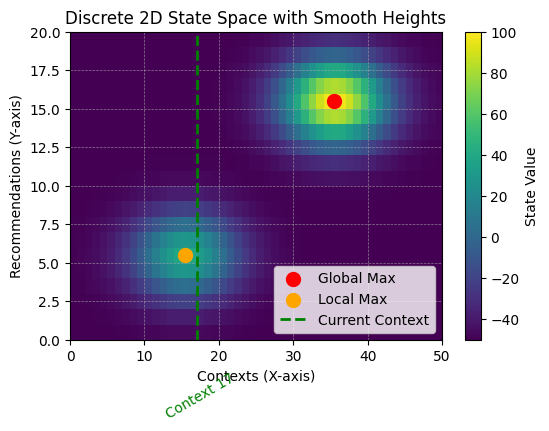

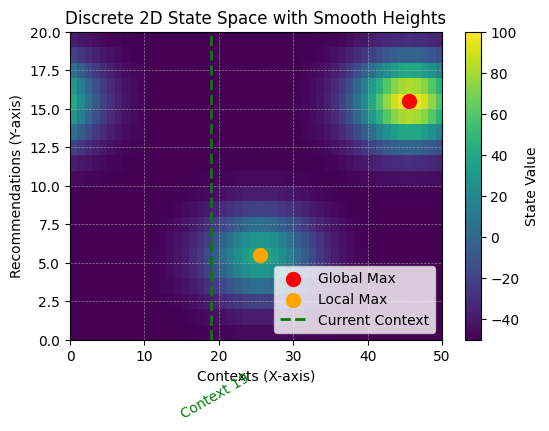

[17, np.int64(22), np.int64(27), np.int64(30), np.int64(34), np.int64(30), np.int64(32), np.int64(27), np.int64(22), np.int64(17), np.int64(19)]


In [2]:
ere = ExogenousRewardEnvironment()
ere.do_gaussian_smoothing()
ere.visualize_landscape(mark_context=True)
for steps in (range(10)):
  ere.step_context()
  ere.shift_environment_right()
ere.visualize_landscape(mark_context=True)
print(ere.get_context_history())

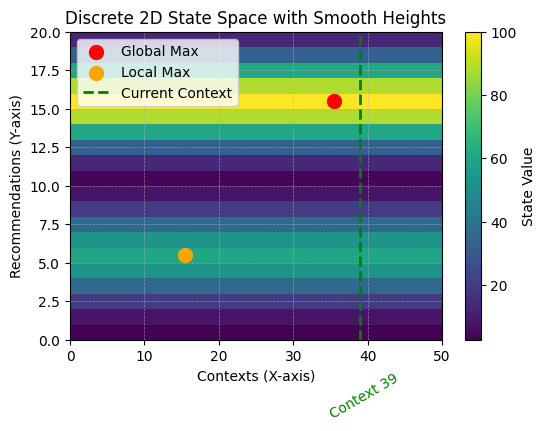

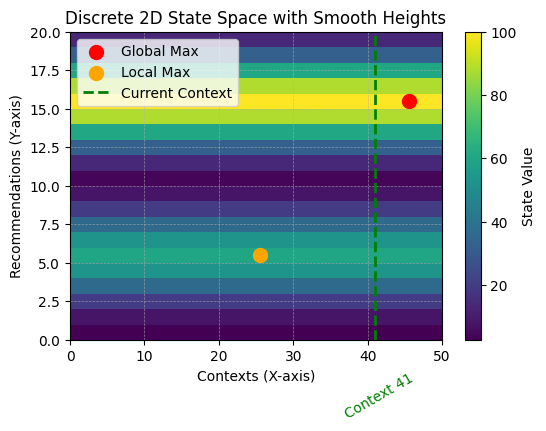

[39, np.int64(44), np.int64(47), np.int64(1), np.int64(49), np.int64(48), np.int64(46), np.int64(42), np.int64(47), np.int64(43), np.int64(41)]


In [3]:
ere = ExogenousRewardEnvironment()
ere.do_rows_gaussian_smoothing()
ere.visualize_landscape(mark_context=True)
for steps in (range(10)):
  ere.step_context()
  ere.shift_environment_right()
ere.visualize_landscape(mark_context=True)
print(ere.get_context_history())

# Simulation Testing

## Stationary, Initiation, No Modulation

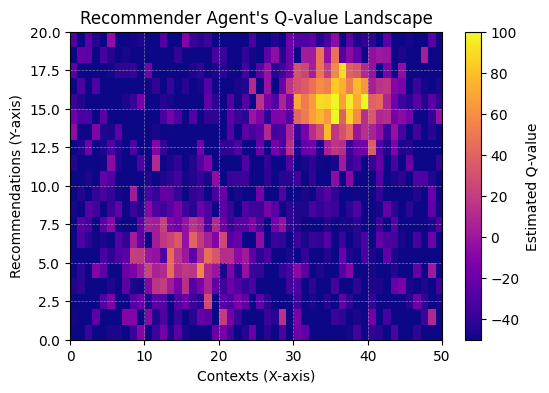

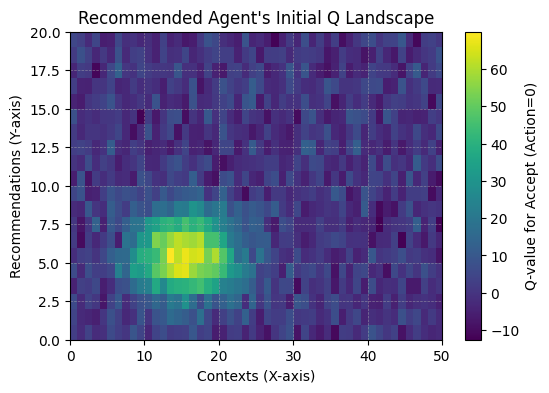

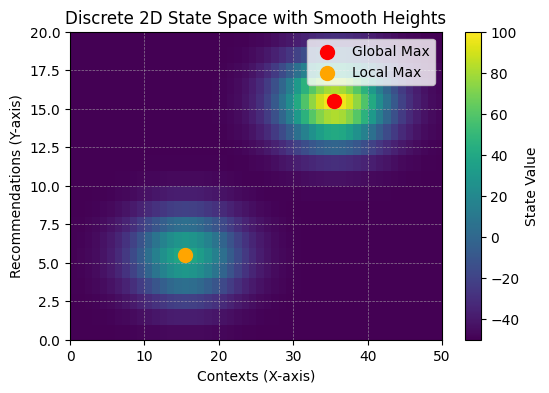

Running Simulation: 100%|██████████| 1000000/1000000 [01:42<00:00, 9797.64it/s]


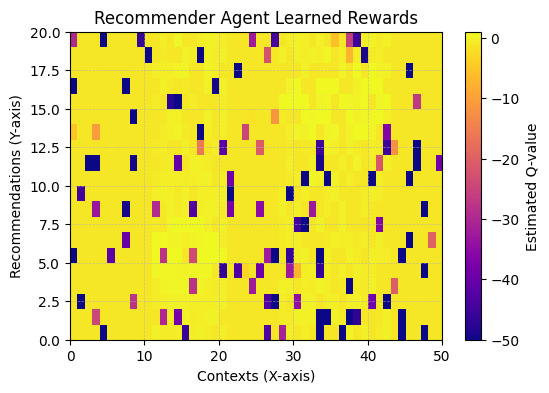

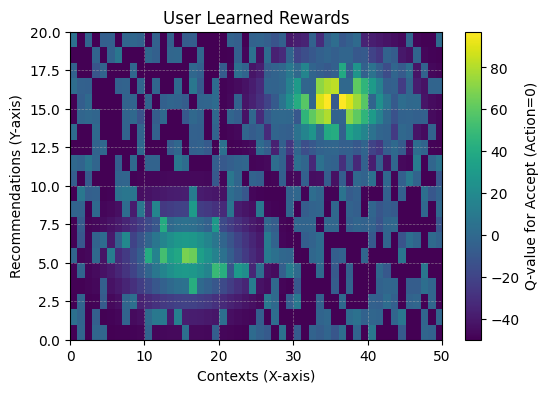

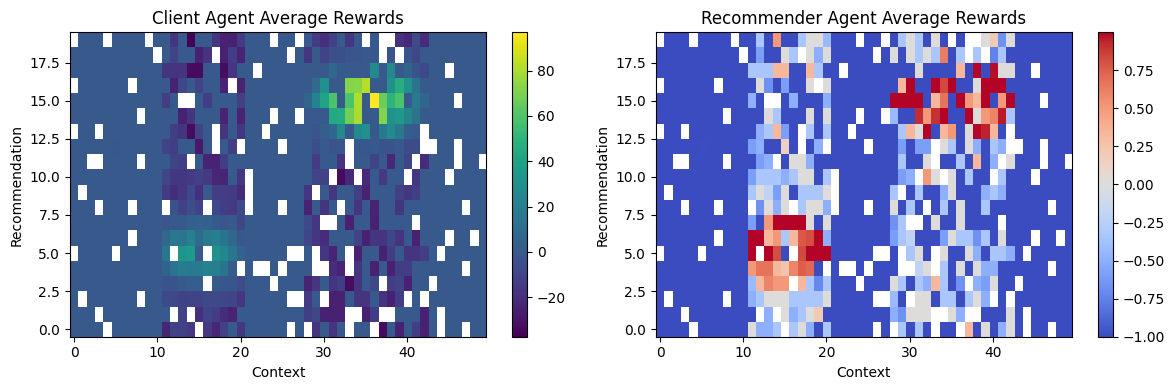

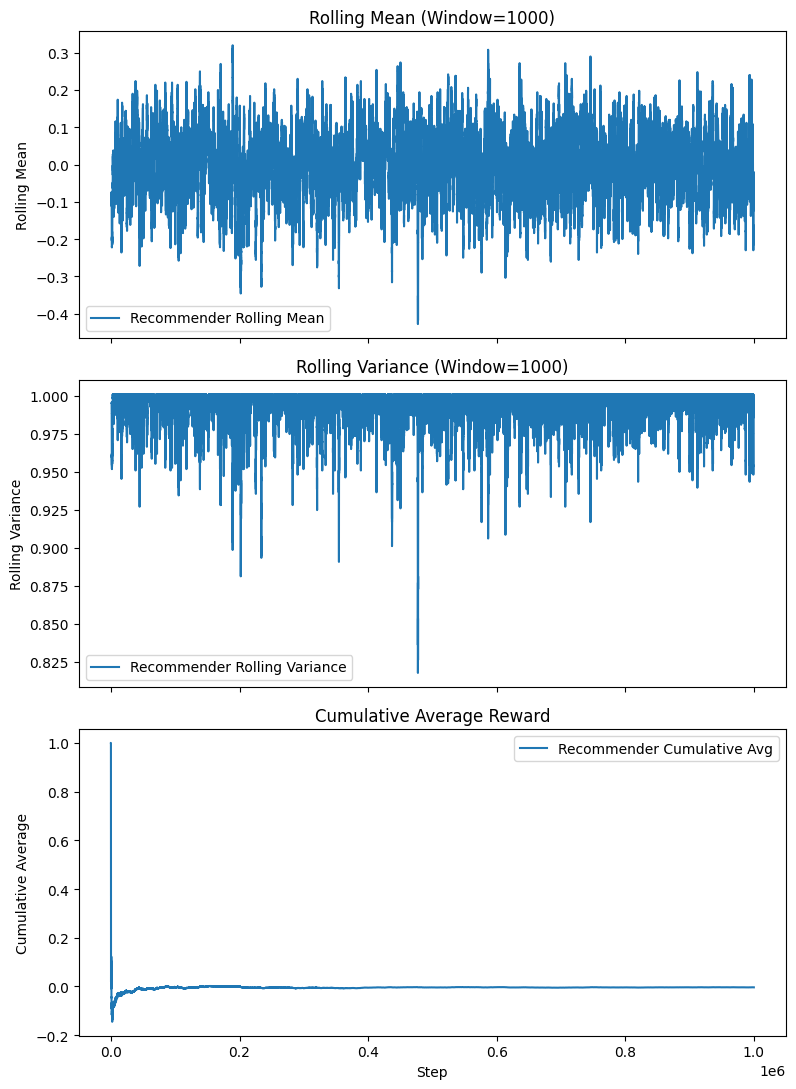

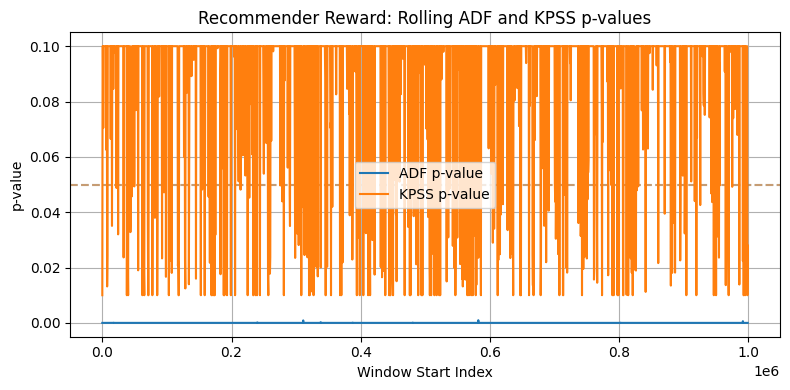

    context  adf_pvalue  kpss_pvalue
0         0         0.0     0.010000
1         1         0.0     0.069998
2         2         0.0     0.045755
3         3         0.0     0.057024
4         4         0.0     0.060835
5         5         0.0     0.089964
6         6         0.0     0.020155
7         7         0.0     0.100000
8         8         0.0     0.088936
9         9         0.0     0.047673
10       10         0.0     0.081916
11       11         0.0     0.064124
12       12         0.0     0.022930
13       13         0.0     0.053915
14       14         0.0     0.024461
15       15         0.0     0.015543
16       16         0.0     0.045086
17       17         0.0     0.100000
18       18         0.0     0.043727
19       19         0.0     0.100000
20       20         0.0     0.086298
21       21         0.0     0.041998
22       22         0.0     0.045605
23       23         0.0     0.060430
24       24         0.0     0.055829
25       25         0.0     0.100000
2

In [4]:
results = run_recommender_simulation(RecommenderAgent,
                                    RecommendedAgent,
                                    ExogenousRewardEnvironment,
                                    modulator_class=MoodSwings,
                                    n_recommendations=20,
                                    n_contexts=50,
                                    n_steps = 1000000,
                                    exploration_rate=1,
                                    exploration_decay=0.999,
                                    initialize_recommender = True,
                                    initialize_recommended = True,
                                    landscape_type='default',
                                    stationarity=True, type='egreedy', modulated = False)
plot_full_results(results["environment_state_space"], results["average_reward_map"], results["average_recommender_map"])
# plot_environment_vs_agent(results["environment_state_space"], results["average_reward_map"])
plot_reward_statistics(results, rolling_window=1000)

reward_series = results["recommender_rewards"]
# ADF test on raw recommender reward sequence
# adf_stationarity_test(reward_series, name="Recommender Reward Signal")
# kpss_test(reward_series, name="Recommender Reward Signal")
# Run sliding window tests
stationarity_df = rolling_stationarity_test(reward_series, window_size=1000, step_size=500)
# Plot the p-values
plot_rolling_stationarity_pvalues(stationarity_df, alpha=0.05, title_prefix="Recommender Reward: ")

stationarity_df = test_stationarity_by_context(
    contexts=results["context_history"],
    rewards=results["recommender_rewards"])
print(stationarity_df)

## Non-Stationary, Initiation, No Modulation



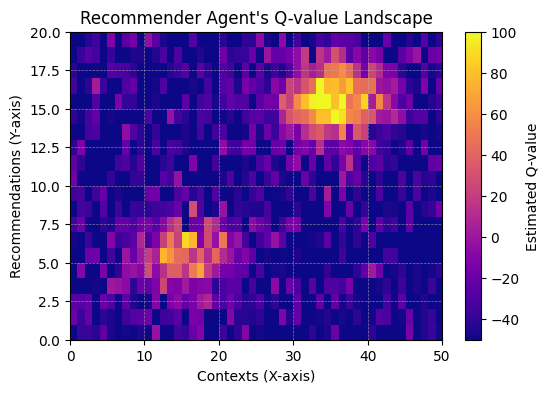

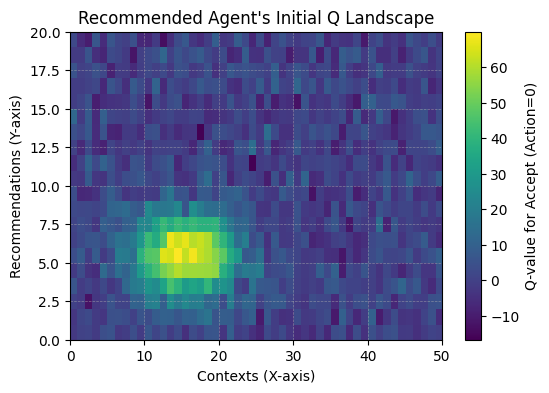

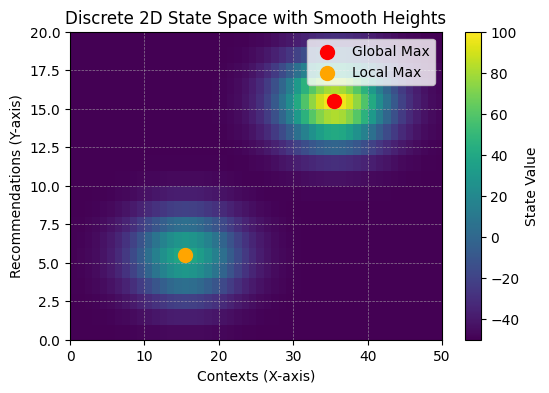

Running Simulation: 100%|██████████| 1000000/1000000 [02:37<00:00, 6364.57it/s]


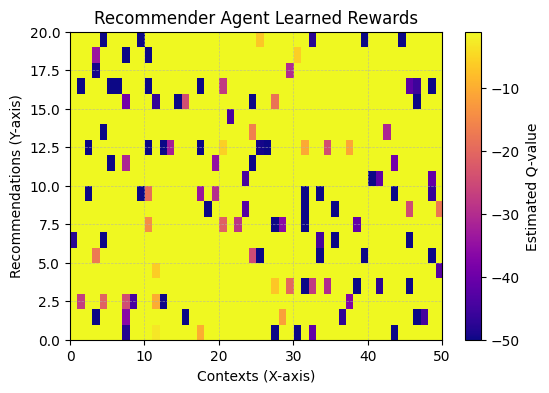

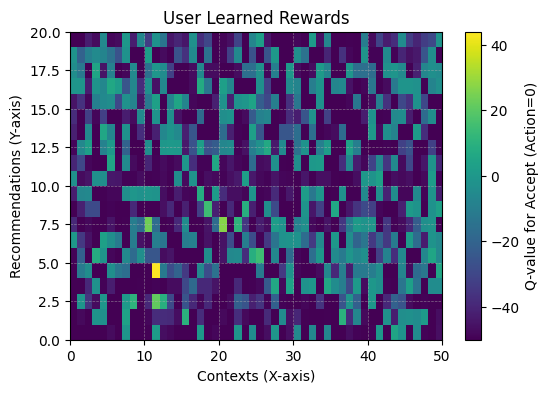

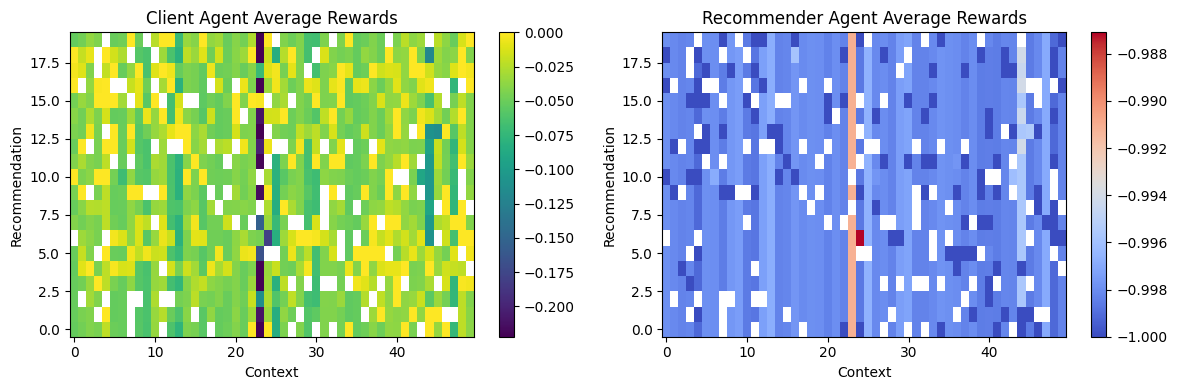

/Users/ignacio/Documents/VS Code/GitHub Repositories/multiagentrecommendation/.venv/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2182: RuntimeWarning: invalid value encountered in scalar divide
  s_hat = s1 / s0
/Users/ignacio/Documents/VS Code/GitHub Repositories/multiagentrecommendation/.venv/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2182: RuntimeWarning: invalid value encountered in scalar divide
  s_hat = s1 / s0
/Users/ignacio/Documents/VS Code/GitHub Repositories/multiagentrecommendation/.venv/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2182: RuntimeWarning: invalid value encountered in scalar divide
  s_hat = s1 / s0
/Users/ignacio/Documents/VS Code/GitHub Repositories/multiagentrecommendation/.venv/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2182: RuntimeWarning: invalid value encountered in scalar divide
  s_hat = s1 / s0
/Users/ignacio/Documents/VS Code/GitHub Repositories/multiagentrecommendation/.venv/lib/python3.10/s

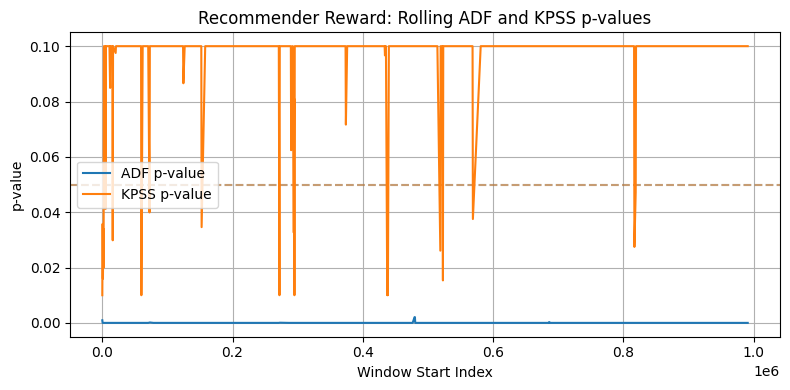

    context    adf_pvalue  kpss_pvalue
0         0  0.000000e+00     0.019100
1         1  0.000000e+00     0.042566
2         2  0.000000e+00     0.051219
3         3  0.000000e+00     0.058637
4         4  0.000000e+00     0.010000
5         5  0.000000e+00     0.029034
6         6  0.000000e+00     0.097113
7         7  0.000000e+00     0.031684
8         8  0.000000e+00     0.054515
9         9  0.000000e+00     0.044101
10       10  0.000000e+00     0.043097
11       11  0.000000e+00     0.033098
12       12  0.000000e+00     0.054982
13       13  0.000000e+00     0.100000
14       14  0.000000e+00     0.048716
15       15  0.000000e+00     0.100000
16       16  0.000000e+00     0.073569
17       17  0.000000e+00     0.066378
18       18  0.000000e+00     0.030276
19       19  0.000000e+00     0.046133
20       20  0.000000e+00     0.094747
21       21  0.000000e+00     0.024359
22       22  0.000000e+00     0.020060
23       23  5.393503e-27     0.034861
24       24  0.000000e+00

In [5]:
results = run_recommender_simulation(RecommenderAgent,
                                    RecommendedAgent,
                                    ExogenousRewardEnvironment,
                                    modulator_class=MoodSwings,
                                    n_recommendations=20,
                                    n_contexts=50,
                                    n_steps = 1000000,
                                    exploration_rate=1,
                                    exploration_decay=0.999,
                                    initialize_recommender = True,
                                    initialize_recommended= True,
                                    landscape_type='default',
                                    stationarity=False, type='ucb', modulated = False)
plot_full_results(results["environment_state_space"], results["average_reward_map"], results["average_recommender_map"])

reward_series = results["recommender_rewards"]
# ADF test on raw recommender reward sequence
# adf_stationarity_test(reward_series, name="Recommender Reward Signal")
# kpss_test(reward_series, name="Recommender Reward Signal")
# Run sliding window tests
stationarity_df = rolling_stationarity_test(reward_series, window_size=1000, step_size=500)
# Plot the p-values
plot_rolling_stationarity_pvalues(stationarity_df, alpha=0.05, title_prefix="Recommender Reward: ")

stationarity_df = test_stationarity_by_context(
    contexts=results["context_history"],
    rewards=results["recommender_rewards"])
print(stationarity_df)

## Stationary, Initiation, Moody Modulation

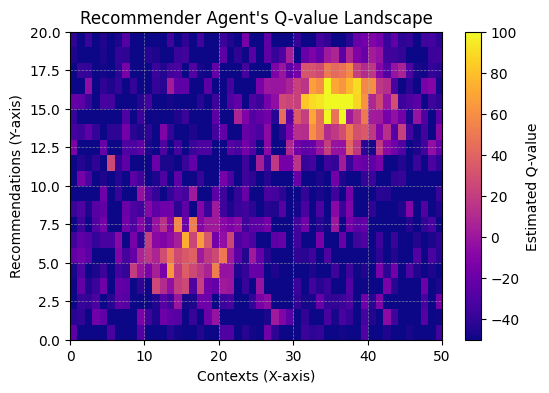

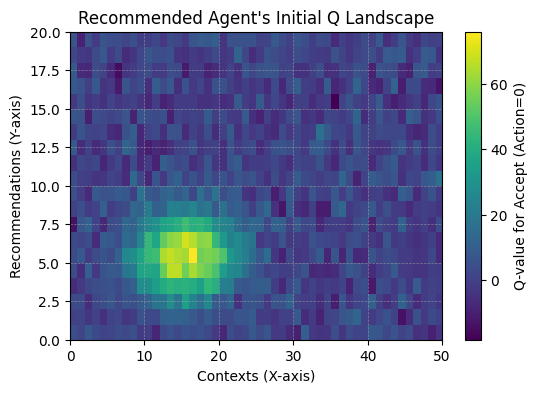

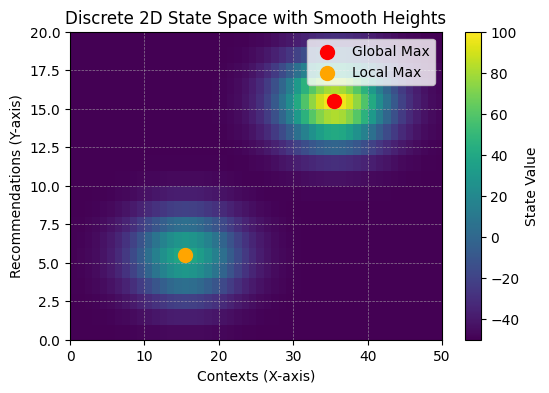

Running Simulation: 100%|██████████| 1000000/1000000 [01:40<00:00, 9945.84it/s]


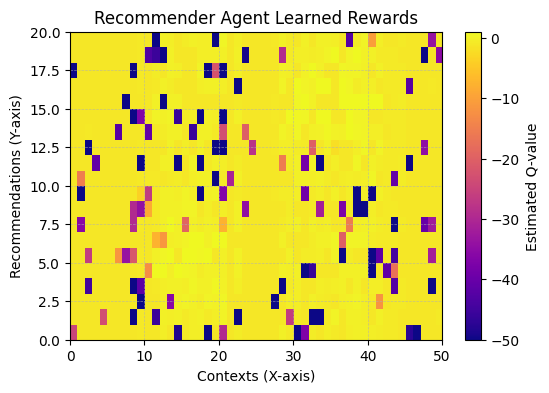

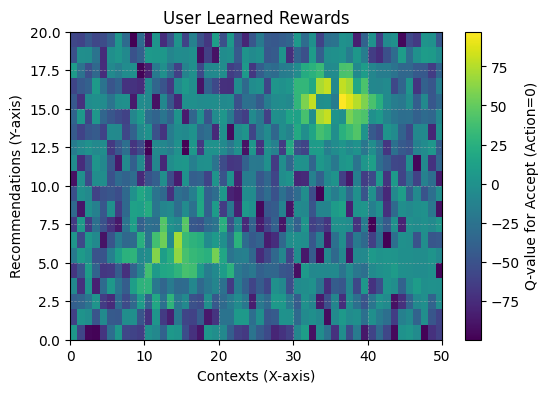

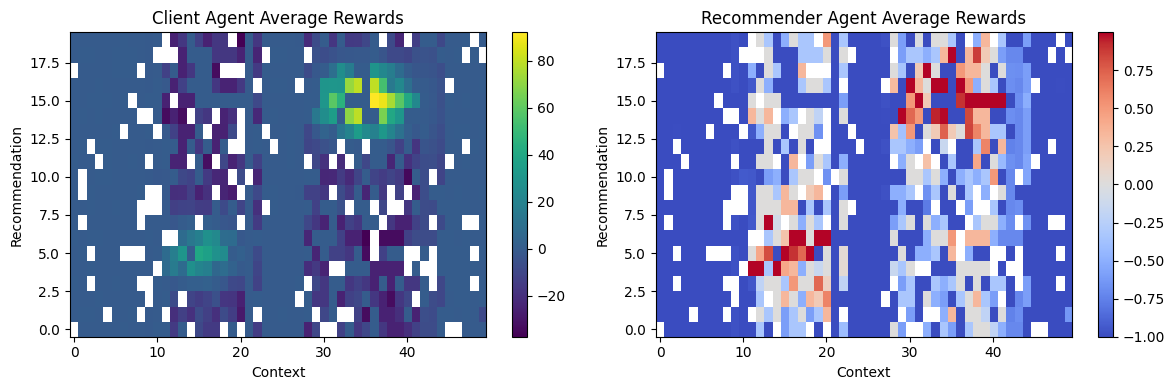

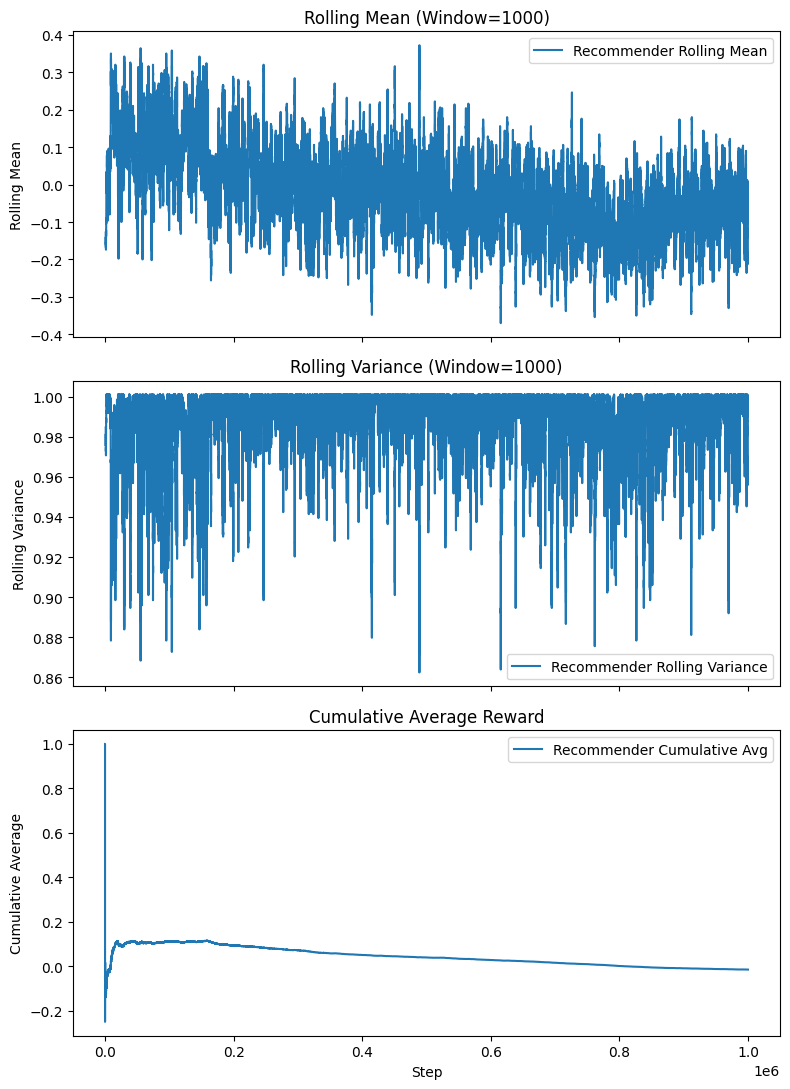

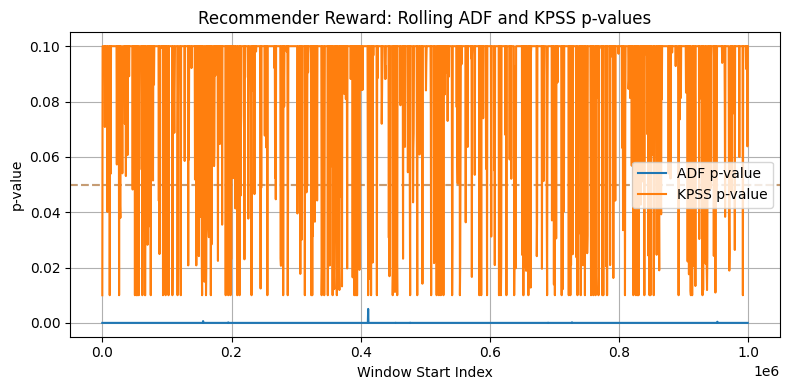

    context    adf_pvalue  kpss_pvalue
0         0  0.000000e+00     0.015821
1         1  0.000000e+00     0.033213
2         2  0.000000e+00     0.100000
3         3  0.000000e+00     0.100000
4         4  0.000000e+00     0.029560
5         5  0.000000e+00     0.020038
6         6  0.000000e+00     0.022181
7         7  0.000000e+00     0.089037
8         8  0.000000e+00     0.085917
9         9  1.682073e-11     0.010000
10       10  0.000000e+00     0.100000
11       11  8.351446e-05     0.010000
12       12  0.000000e+00     0.100000
13       13  8.187290e-30     0.100000
14       14  0.000000e+00     0.081024
15       15  0.000000e+00     0.089398
16       16  0.000000e+00     0.032497
17       17  0.000000e+00     0.022930
18       18  0.000000e+00     0.088781
19       19  2.160334e-01     0.010000
20       20  1.309557e-09     0.010000
21       21  0.000000e+00     0.020073
22       22  3.893409e-01     0.010000
23       23  4.519188e-21     0.025567
24       24  0.000000e+00

In [6]:
results = run_recommender_simulation(RecommenderAgent,
                                    RecommendedAgent,
                                    ExogenousRewardEnvironment,
                                    modulator_class=MoodSwings,
                                    n_recommendations=20,
                                    n_contexts=50,
                                    n_steps = 1000000,
                                    exploration_rate=1,
                                    exploration_decay=0.999,
                                    initialize_recommender = True,
                                    initialize_recommended = True,
                                    landscape_type='default',
                                    stationarity=True, type='egreedy', modulated = True)
plot_full_results(results["environment_state_space"], results["average_reward_map"], results["average_recommender_map"])
# plot_environment_vs_agent(results["environment_state_space"], results["average_reward_map"])
plot_reward_statistics(results, rolling_window=1000)

reward_series = results["recommender_rewards"]
# ADF test on raw recommender reward sequence
# adf_stationarity_test(reward_series, name="Recommender Reward Signal")
# kpss_test(reward_series, name="Recommender Reward Signal")
# Run sliding window tests
stationarity_df = rolling_stationarity_test(reward_series, window_size=1000, step_size=500)
# Plot the p-values
plot_rolling_stationarity_pvalues(stationarity_df, alpha=0.05, title_prefix="Recommender Reward: ")

stationarity_df = test_stationarity_by_context(
    contexts=results["context_history"],
    rewards=results["recommender_rewards"])
print(stationarity_df)

## Stationary, Initiation, Homeostatic Modulation

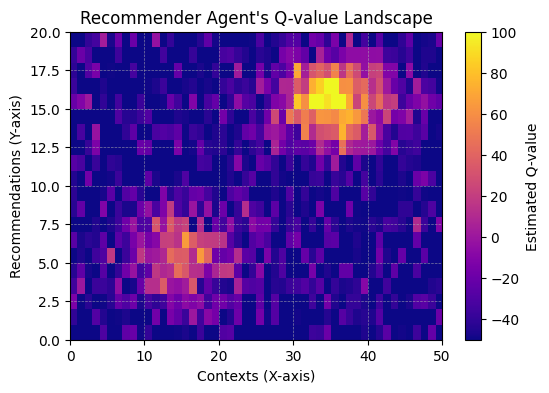

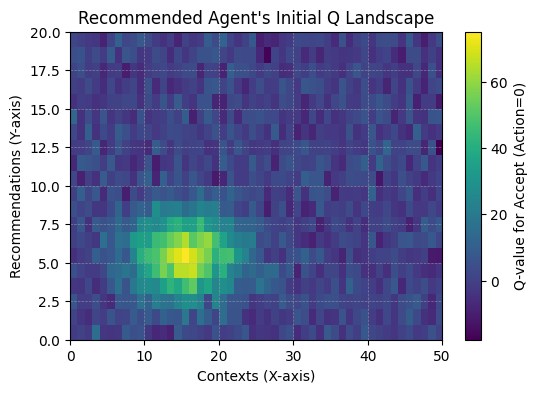

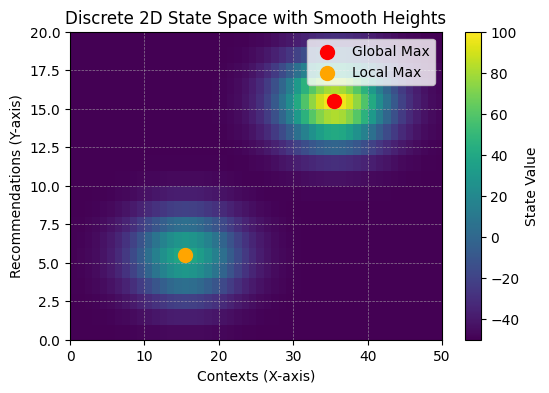

Running Simulation: 100%|██████████| 100000/100000 [00:14<00:00, 6822.32it/s]


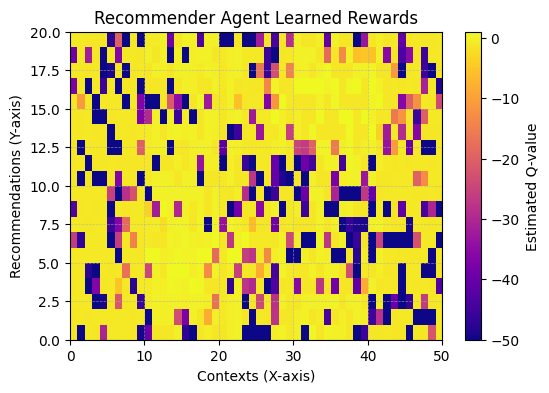

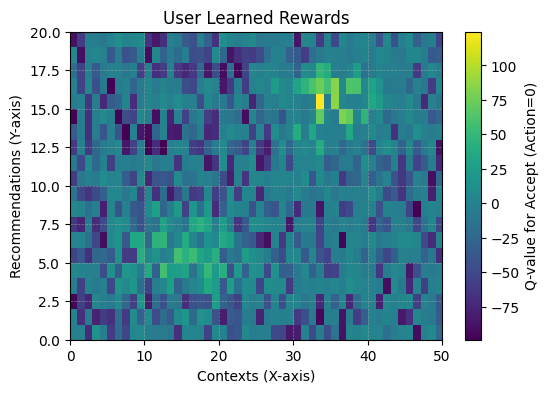

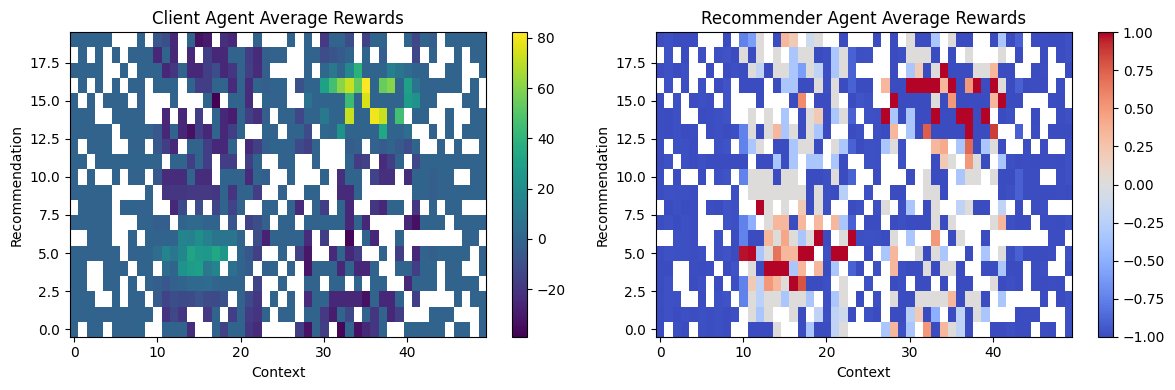

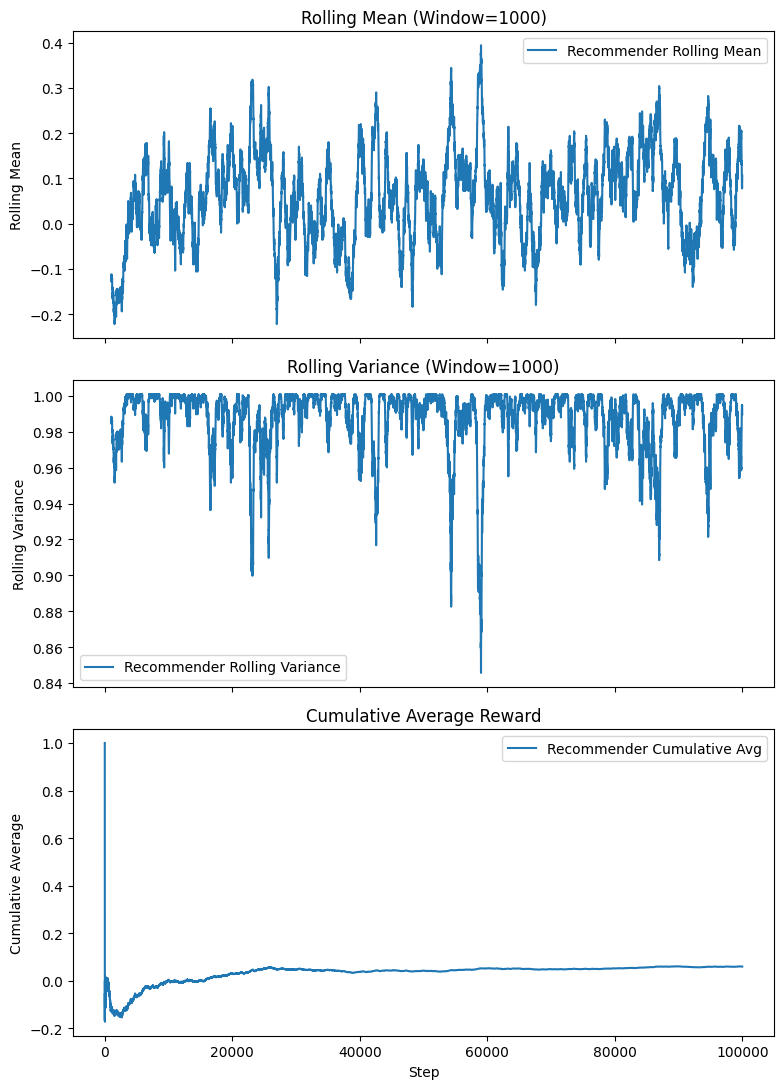

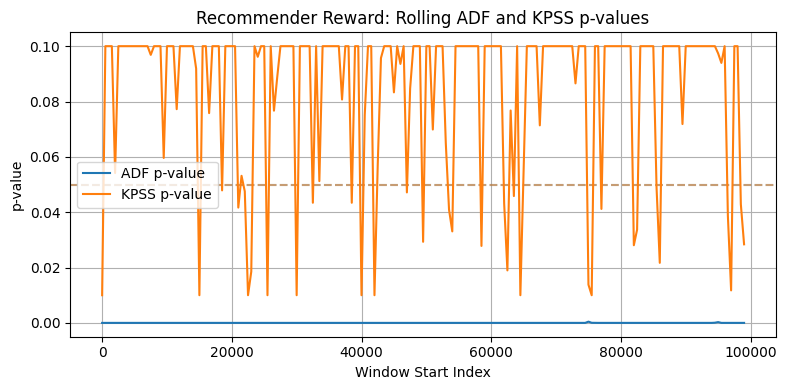

    context    adf_pvalue  kpss_pvalue
0         0  1.153734e-22     0.010000
1         1  9.031491e-16     0.010000
2         2  3.960082e-24     0.010000
3         3  4.938729e-24     0.010000
4         4  0.000000e+00     0.010000
5         5  0.000000e+00     0.015998
6         6  2.178533e-26     0.010000
7         7  8.246750e-30     0.018868
8         8  8.066418e-09     0.010000
9         9  2.628625e-06     0.010000
10       10  9.555583e-05     0.010000
11       11  1.273187e-10     0.010000
12       12  1.367255e-12     0.019196
13       13  3.296613e-24     0.010000
14       14  4.238861e-11     0.010000
15       15  4.527650e-27     0.010000
16       16  3.179676e-16     0.010000
17       17  3.947768e-16     0.010000
18       18  5.676396e-24     0.010000
19       19  1.968504e-06     0.010000
20       20  6.733463e-20     0.010000
21       21  2.741213e-30     0.021558
22       22  2.456001e-11     0.010000
23       23  4.464680e-01     0.010000
24       24  1.490839e-09

In [7]:
results = run_recommender_simulation(RecommenderAgent,
                                    RecommendedAgent,
                                    ExogenousRewardEnvironment,
                                    modulator_class=MoodSwings,
                                    n_recommendations=20,
                                    n_contexts=50,
                                    n_steps = 100000,
                                    exploration_rate=1,
                                    exploration_decay=0.999,
                                    initialize_recommender = True,
                                    initialize_recommended = True,
                                    landscape_type='default',
                                    stationarity=True, type='egreedy', modulated = True)
plot_full_results(results["environment_state_space"], results["average_reward_map"], results["average_recommender_map"])
# plot_environment_vs_agent(results["environment_state_space"], results["average_reward_map"])
plot_reward_statistics(results, rolling_window=1000)

reward_series = results["recommender_rewards"]
# ADF test on raw recommender reward sequence
# adf_stationarity_test(reward_series, name="Recommender Reward Signal")
# kpss_test(reward_series, name="Recommender Reward Signal")
# Run sliding window tests
stationarity_df = rolling_stationarity_test(reward_series, window_size=1000, step_size=500)
# Plot the p-values
plot_rolling_stationarity_pvalues(stationarity_df, alpha=0.05, title_prefix="Recommender Reward: ")

stationarity_df = test_stationarity_by_context(
    contexts=results["context_history"],
    rewards=results["recommender_rewards"])
print(stationarity_df)